In [1]:
import os
os.chdir('D:/IIM/Competitions/Resolvr') # changing working directory to required file location
os.getcwd()

'D:\\IIM\\Competitions\\Resolvr'

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pal = ['#009786','#7CCC4E', '#1E2A39']

sns.set(style="whitegrid", font='sans-serif',color_codes = True)
sns.set_palette(pal)
%matplotlib inline


import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('resolvr.csv')
data.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Non Business,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3


In [4]:
ratio = data[['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']]
nominal = data[['Gender','Customer Type','Type of Travel']]
ordinal = data[['Class']]
interval = data.iloc[:,6:20]

In [5]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,ln(Dep_Delay),ln(Arr_Delay)
0,Male,Loyal Customer,13,Personal Travel,Non Business,460,3.0,4.0,3.0,1.0,...,3.0,4.0,4.0,5.0,5.0,25,18,0,3.258097,2.944439
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,...,5.0,3.0,1.0,4.0,1.0,1,6,0,0.693147,1.945910
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,...,3.0,4.0,4.0,4.0,5.0,0,0,1,0.000000,0.000000
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,...,5.0,3.0,1.0,4.0,2.0,11,9,0,2.484907,2.302585
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,3.0,3.0,0,0,1,0.000000,0.000000
5,Female,Loyal Customer,26,Personal Travel,Non Business,1180,3.0,4.0,2.0,1.0,...,4.0,4.0,4.0,4.0,1.0,0,0,0,0.000000,0.000000
6,Female,Loyal Customer,52,Business travel,Business,2035,4.0,3.0,4.0,4.0,...,5.0,5.0,4.0,5.0,4.0,4,0,1,1.609438,0.000000
7,Female,Loyal Customer,41,Business travel,Business,853,1.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,0,0,0,0.000000,0.000000
8,Male,disloyal Customer,20,Business travel,Non Business,1061,3.0,3.0,3.0,4.0,...,3.0,4.0,4.0,3.0,2.0,0,0,0,0.000000,0.000000
9,Female,disloyal Customer,24,Business travel,Non Business,1182,4.0,5.0,5.0,4.0,...,3.0,5.0,3.0,5.0,2.0,0,0,0,0.000000,0.000000


Text(0.5, 0, 'Class')

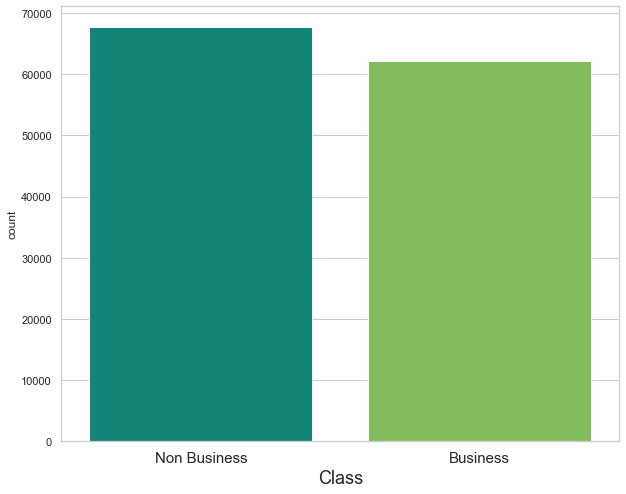

In [4]:
data_1 = data.copy()
plt.figure(figsize = (10,8))
sns.countplot(data_1['Class'])
plt.xticks(rotation=0,fontsize = 15)
plt.xlabel('Class', fontsize=18)

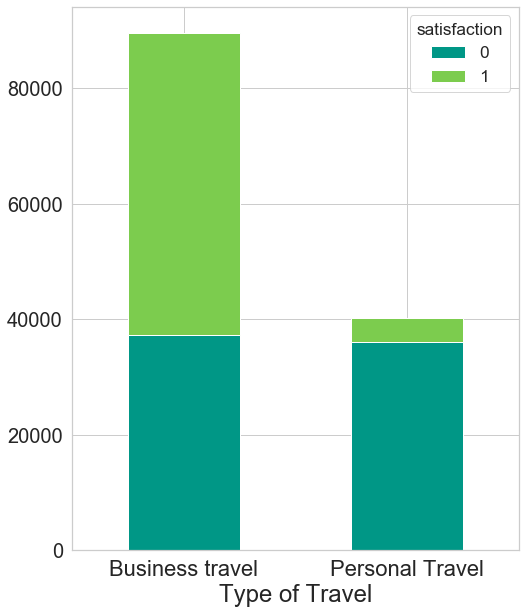

In [49]:
counts = data_1.groupby(['Type of Travel', 'satisfaction']).satisfaction.count().unstack()
counts.plot(kind='bar', stacked=True,figsize = (8,10))
plt.xticks(rotation=0, fontsize = 22)
plt.yticks(fontsize = 20)
plt.xlabel('Type of Travel', fontsize=24)
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(title="satisfaction",fontsize = "xx-large",loc = 0)

In [8]:
tab = pd.crosstab(index = data_1['Type of Travel'], columns = data_1["satisfaction"])
print(tab)

#Null hypothesis: There is no relation between type of travel and satisfaction
#Alt hypothesis: There is relation between type of travel and satisfaction

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfaction         0      1
Type of Travel               
Business travel  37323  52343
Personal Travel  36102   4072
chi-sq-statistic:  26273.5104  p-value: 0.0  deg of freedom: 1
Reject Null Hypothesis


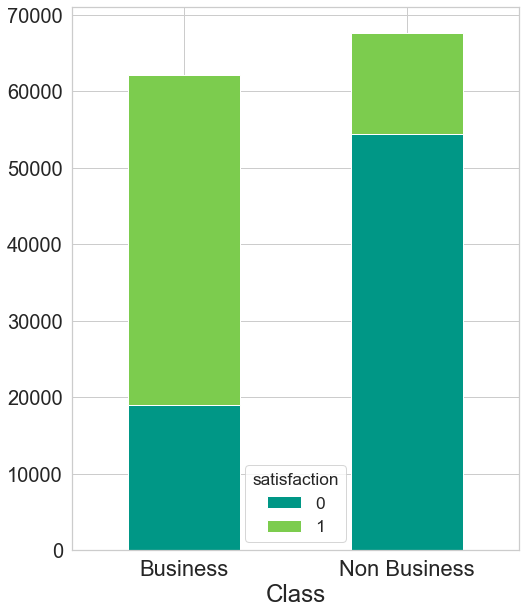

In [9]:
counts = data_1.groupby(['Class', 'satisfaction']).satisfaction.count().unstack()
counts.plot(kind='bar', stacked=True,figsize = (8,10))

plt.xlabel('Class', fontsize=24)
plt.xticks(rotation=0, fontsize = 22)
plt.yticks(fontsize = 20)
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(title="satisfaction",fontsize = "xx-large",loc = 8)

In [10]:
tab = pd.crosstab(index = data_1['Class'], columns = data_1["satisfaction"])
print(tab)

#Null hypothesis: There is no relation between class and satisfaction
#Alt hypothesis: There is relation between class and satisfaction

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfaction      0      1
Class                     
Business      18986  43154
Non Business  54439  13261
chi-sq-statistic:  32777.9524  p-value: 0.0  deg of freedom: 1
Reject Null Hypothesis


In [11]:
# the count of Eco plus is quiet less
# number of satisfied customers in business is much more than the others


In [12]:
# Creating a new category by  merging Eco plus and Eco into "Non-Business"

data_1.loc[data_1['Class'] == "Eco", ['Class']] = "Non Business"
data_1.loc[data_1['Class'] == "Eco Plus", ['Class']] = "Non Business"

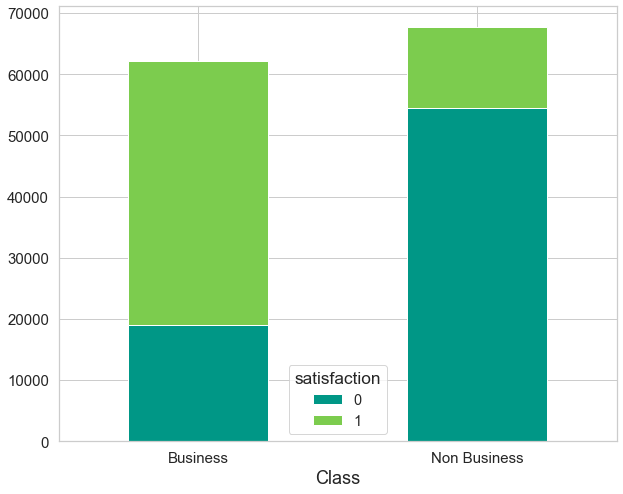

In [13]:
counts = data_1.groupby(['Class', 'satisfaction']).satisfaction.count().unstack()
counts.plot(kind='bar', stacked=True,figsize = (10,8), fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel('Class', fontsize=18)
plt.legend(title="satisfaction",fontsize = "x-large",loc = 8)

In [14]:
# we can clearly see number of satisfied customers in business is much more than in Non Business

In [15]:
data_1.to_csv("resolvr.csv", index = False)

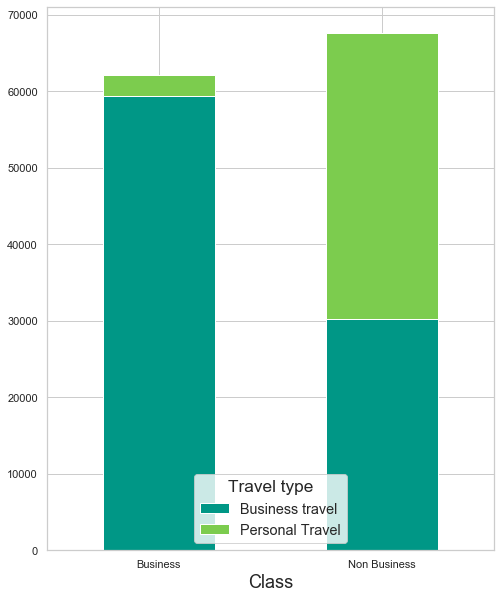

In [16]:
counts = data_1.groupby(['Class', 'Type of Travel']).Class.count().unstack()
counts.plot(kind='bar', stacked=True, figsize = (8,10))
plt.xticks(rotation=0)
plt.xlabel('Class', fontsize=18)
plt.legend(title="Travel type",fontsize = "x-large",loc = 8)

In [17]:
data_1.loc[(data_1['Class'] == "Business") & (data_1['Type of Travel'] == "Personal Travel")]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,ln(Dep_Delay),ln(Arr_Delay)
33,Female,Loyal Customer,22,Personal Travel,Business,349,2.0,4.0,2.0,1.0,...,5.0,4.0,4.0,5.0,4.0,0,0,0,0.000000,0.000000
76,Male,Loyal Customer,19,Personal Travel,Business,342,3.0,1.0,3.0,2.0,...,1.0,3.0,1.0,3.0,3.0,0,0,0,0.000000,0.000000
118,Female,Loyal Customer,58,Personal Travel,Business,371,3.0,5.0,5.0,1.0,...,5.0,1.0,3.0,1.0,3.0,0,0,0,0.000000,0.000000
123,Female,Loyal Customer,54,Personal Travel,Business,844,4.0,5.0,5.0,2.0,...,5.0,3.0,3.0,3.0,4.0,0,0,0,0.000000,0.000000
205,Male,Loyal Customer,65,Personal Travel,Business,226,1.0,4.0,1.0,1.0,...,1.0,4.0,5.0,4.0,3.0,37,20,0,3.637586,3.044522
223,Female,Loyal Customer,46,Personal Travel,Business,119,4.0,0.0,4.0,1.0,...,4.0,4.0,3.0,4.0,3.0,13,32,0,2.639057,3.496508
304,Male,Loyal Customer,55,Personal Travel,Business,432,4.0,4.0,2.0,1.0,...,2.0,2.0,4.0,3.0,5.0,0,0,0,0.000000,0.000000
462,Male,Loyal Customer,7,Personal Travel,Business,1034,2.0,4.0,2.0,2.0,...,2.0,3.0,4.0,2.0,4.0,143,121,0,4.969813,4.804021
463,Female,Loyal Customer,65,Personal Travel,Business,1042,4.0,5.0,4.0,4.0,...,4.0,2.0,5.0,4.0,5.0,48,30,0,3.891820,3.433987
625,Female,Loyal Customer,16,Personal Travel,Business,1325,5.0,4.0,5.0,3.0,...,4.0,5.0,4.0,4.0,4.0,243,226,1,5.497168,5.424950


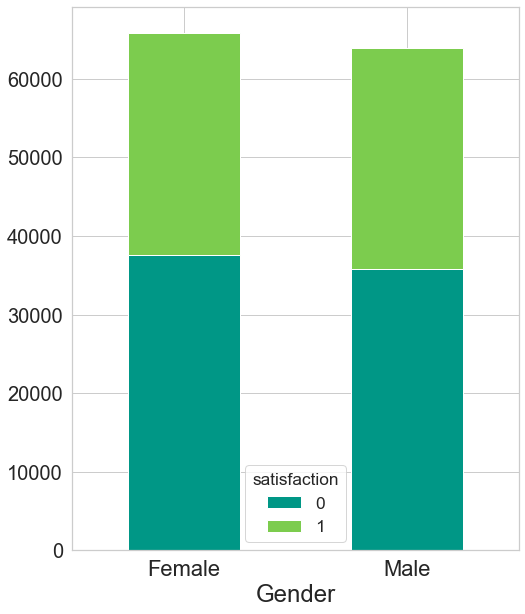

In [18]:
counts = data_1.groupby(['Gender', 'satisfaction']).satisfaction.count().unstack()
counts.plot(kind='bar', stacked=True, figsize = (8,10))
plt.xlabel('Gender', fontsize=24)
plt.xticks(rotation=0, fontsize = 22)
plt.yticks(fontsize = 20)
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(title="satisfaction",fontsize = "xx-large",loc = 8)

In [19]:
tab = pd.crosstab(index = data_1['Gender'], columns = data_1["satisfaction"])
print(tab)

#Null hypothesis: There is no relation between gender and satisfaction
#Alt hypothesis: There is relation between gender and satisfaction

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfaction      0      1
Gender                    
Female        37617  28264
Male          35808  28151
chi-sq-statistic:  16.3027  p-value: 0.0001  deg of freedom: 1
Reject Null Hypothesis


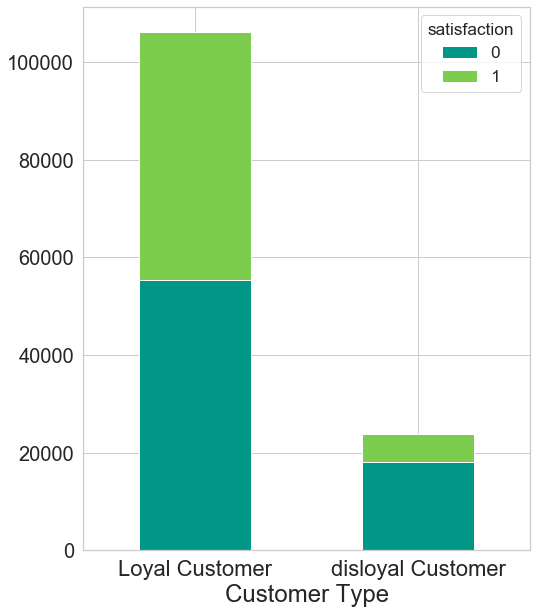

In [20]:
counts = data_1.groupby(['Customer Type', 'satisfaction']).satisfaction.count().unstack()
fig = counts.plot(kind='bar', stacked=True, figsize = (8,10), fontsize = 15)
plt.xlabel('Customer Type', fontsize=24)
plt.xticks(rotation=0, fontsize = 22)
plt.yticks(fontsize = 20)
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(title="satisfaction",fontsize = "xx-large",loc = 0)

In [21]:
tab = pd.crosstab(index = data_1['Customer Type'], columns = data_1["satisfaction"])
print(tab)

#Null hypothesis: There is no relation between customer type and satisfaction
#Alt hypothesis: There is relation between customer type and satisfaction

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfaction           0      1
Customer Type                  
Loyal Customer     55355  50717
disloyal Customer  18070   5698
chi-sq-statistic:  4490.4969  p-value: 0.0  deg of freedom: 1
Reject Null Hypothesis


Text(0, 0.5, 'Age')

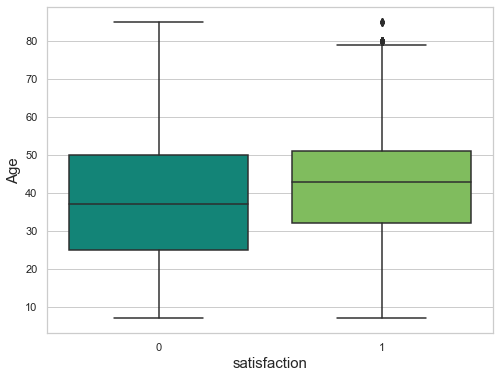

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'satisfaction', y = 'Age', data = data_1)
plt.xticks(rotation=0)
plt.xlabel('satisfaction', fontsize=15)
plt.ylabel('Age', fontsize = 15)

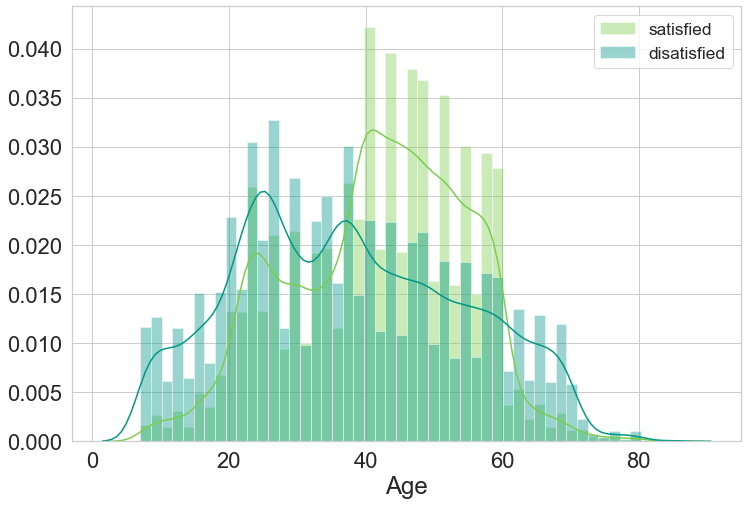

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(data_1[data_1['satisfaction'] == 1]['Age'],color = '#7CCC4E', kde=True, norm_hist = False,label = 'satisfied')
sns.distplot(data_1[data_1['satisfaction'] == 0]['Age'],color = '#009786',kde=True, norm_hist = False,label = 'disatisfied')
plt.xticks(rotation=0,fontsize = 22)
plt.yticks(rotation=0,fontsize = 22)
plt.xlabel('Age', fontsize=24)
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(fontsize = "xx-large")

In [24]:
from scipy import stats
satisfied = data_1[data_1['satisfaction'] == 1]['Age']
dissatisfied = data_1[data_1['satisfaction'] == 0]['Age']

print("satisfied: ",satisfied.mean())
print("dissatisfied: ",dissatisfied.mean())

interim = stats.ttest_ind(satisfied,dissatisfied,equal_var=False)
tstatistic = interim.statistic
pvalue = 1 - interim.pvalue/2  # use p-value / 2 & 1 - cdf when alternate hypothesis is > type
if tstatistic > 0:
   pvalue = 1-pvalue 

print( "t-statistic: ", round(tstatistic, 4) , " p-value:", round(pvalue, 4) )
if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfied:  41.7423380306656
dissatisfied:  37.65243445692884
t-statistic:  50.36  p-value: 0.0
Reject Null Hypothesis


Text(0, 0.5, 'Flight Distance')

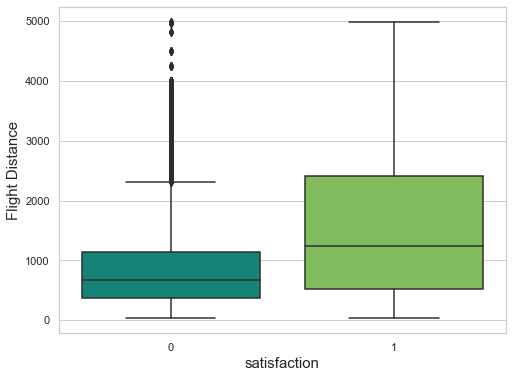

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'satisfaction', y = 'Flight Distance', data = data_1)
plt.xticks(rotation=0)
plt.xlabel('satisfaction', fontsize=15)
plt.ylabel('Flight Distance',fontsize=15)

In [26]:
# outliers impacting satisfaction ? treatment needed ?
# flight distance not the single cause, plot on right shows that some customers have travelled long distance but are satisfied

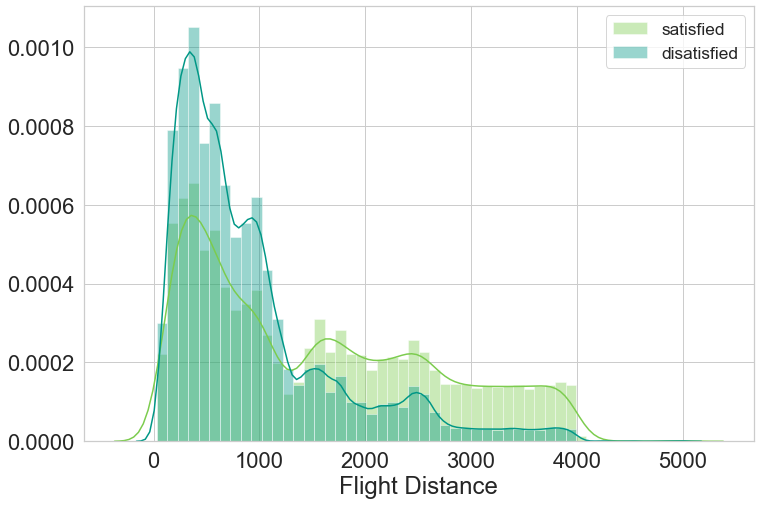

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(data_1[data_1['satisfaction'] == 1]['Flight Distance'],color = '#7CCC4E',label = 'satisfied')
sns.distplot(data_1[data_1['satisfaction'] == 0]['Flight Distance'],color = '#009786',label = 'disatisfied')
plt.xticks(rotation=0,fontsize = 22)
plt.yticks(rotation=0,fontsize = 22)
plt.xlabel('Flight Distance', fontsize=24)
plt.legend(fontsize = "xx-large")

In [28]:
from scipy import stats
satisfied = data_1[data_1['satisfaction'] == 1]['Flight Distance']
dissatisfied = data_1[data_1['satisfaction'] == 0]['Flight Distance']

print("satisfied: ",satisfied.mean())
print("dissatisfied: ",dissatisfied.mean())

interim = stats.ttest_ind(satisfied,dissatisfied,equal_var=False)
tstatistic = interim.statistic
pvalue = 1 - interim.pvalue/2  # use p-value / 2 & 1 - cdf when alternate hypothesis is > type
if tstatistic > 0:
   pvalue = 1-pvalue 

print( "t-statistic: ", round(tstatistic, 4) , " p-value:", round(pvalue, 4) )
if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfied:  1529.449703093149
dissatisfied:  929.7603677221655
t-statistic:  107.594  p-value: 0.0
Reject Null Hypothesis


Text(0, 0.5, 'ln(Arr_Delay)')

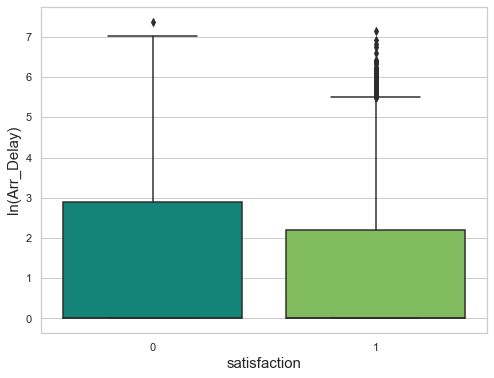

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'satisfaction', y = 'ln(Arr_Delay)', data = data_1)
plt.xticks(rotation=0)
plt.xlabel('satisfaction', fontsize=15)
plt.ylabel('ln(Arr_Delay)',fontsize=15)

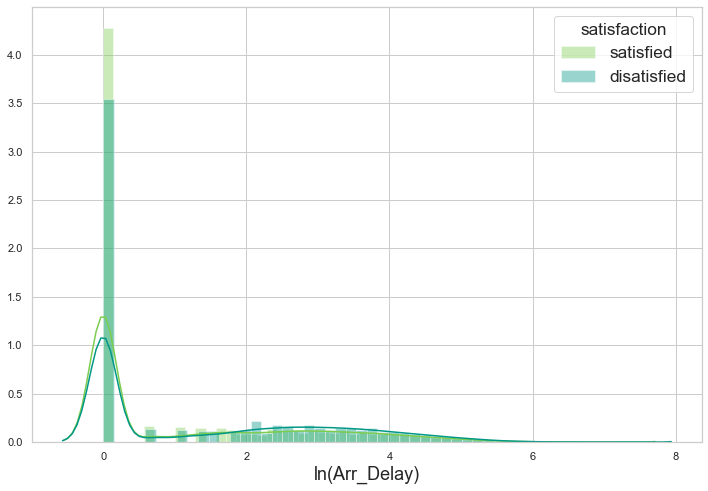

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(data_1[data_1['satisfaction'] == 1]['ln(Arr_Delay)'],color = '#7CCC4E',label = 'satisfied')
sns.distplot(data_1[data_1['satisfaction'] == 0]['ln(Arr_Delay)'],color = '#009786',label = 'disatisfied')
plt.xticks(rotation=0)
plt.xlabel('ln(Arr_Delay)', fontsize=18)
plt.legend(title="satisfaction",fontsize = "xx-large")

In [31]:
from scipy import stats
satisfied = data_1[data_1['satisfaction'] == 1]['ln(Arr_Delay)']
dissatisfied = data_1[data_1['satisfaction'] == 0]['ln(Arr_Delay)']

print("satisfied: ",satisfied.mean())
print("dissatisfied: ",dissatisfied.mean())

interim = stats.ttest_ind(satisfied,dissatisfied,equal_var=False)
tstatistic = interim.statistic
pvalue = 1 - interim.pvalue/2  # use p-value / 2 & 1 - cdf when alternate hypothesis is > type
if tstatistic > 0:
   pvalue = 1-pvalue 

print( "t-statistic: ", round(tstatistic, 4) , " p-value:", round(pvalue, 4) )
if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfied:  1.0775065267503043
dissatisfied:  1.410697771895981
t-statistic:  -37.0398  p-value: 1.0
Retain Null Hypothesis


Text(0, 0.5, 'ln(Dep_Delay)')

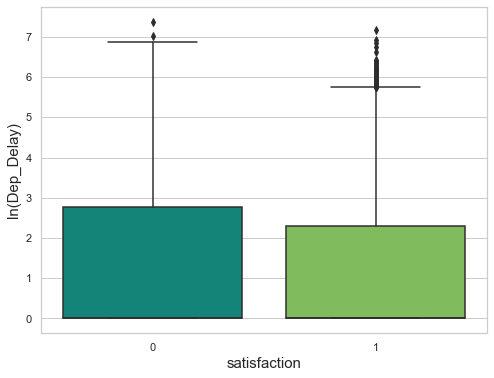

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'satisfaction', y = 'ln(Dep_Delay)', data = data_1)
plt.xticks(rotation=0)
plt.xlabel('satisfaction', fontsize=15)
plt.ylabel('ln(Dep_Delay)',fontsize=15)

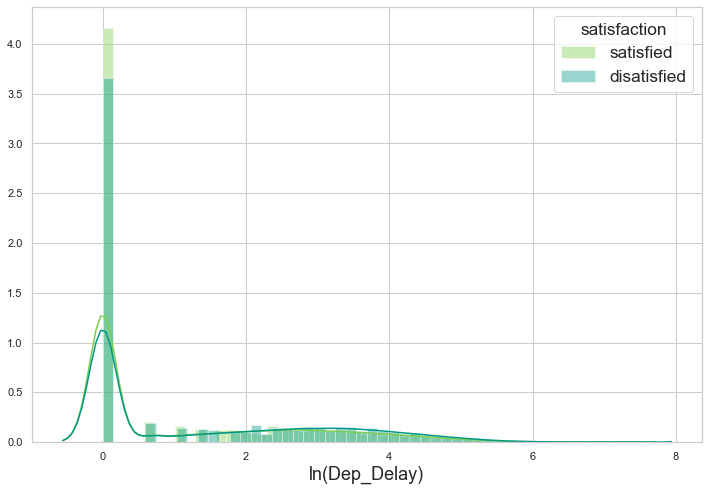

In [33]:
plt.figure(figsize=(12,8))
sns.distplot(data_1[data_1['satisfaction'] == 1]['ln(Dep_Delay)'],color = '#7CCC4E',label = 'satisfied')
sns.distplot(data_1[data_1['satisfaction'] == 0]['ln(Dep_Delay)'],color = '#009786',label = 'disatisfied')
plt.xticks(rotation=0)
plt.xlabel('ln(Dep_Delay)', fontsize=18)
plt.legend(title="satisfaction",fontsize = "xx-large")

In [34]:
from scipy import stats
satisfied = data_1[data_1['satisfaction'] == 1]['ln(Dep_Delay)']
dissatisfied = data_1[data_1['satisfaction'] == 0]['ln(Dep_Delay)']

print("satisfied: ",satisfied.mean())
print("dissatisfied: ",dissatisfied.mean())

interim = stats.ttest_ind(satisfied,dissatisfied,equal_var=False)
tstatistic = interim.statistic
pvalue = 1 - interim.pvalue/2  # use p-value / 2 & 1 - cdf when alternate hypothesis is > type
if tstatistic > 0:
   pvalue = 1-pvalue 

print( "t-statistic: ", round(tstatistic, 4) , " p-value:", round(pvalue, 4) )
if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfied:  1.101283832538484
dissatisfied:  1.3355857726601081
t-statistic:  -26.1895  p-value: 1.0
Retain Null Hypothesis


In [12]:
scaled_features = data_1.copy()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

col_names = ['Age', 'Flight Distance']
features = scaled_features[col_names]
scaler = from sklearn.preprocessing import MinMaxScaler
().fit(features.values)
features = scaler.transform(features.values)

In [17]:
scaled_features[col_names] = features

In [18]:
from scipy import stats
satisfied = scaled_features[scaled_features['satisfaction'] == 1]['Flight Distance']
dissatisfied = scaled_features[scaled_features['satisfaction'] == 0]['Flight Distance']

print("satisfied: ",satisfied.mean())
print("dissatisfied: ",dissatisfied.mean())

interim = stats.ttest_ind(satisfied,dissatisfied,equal_var=False)
tstatistic = interim.statistic
pvalue = 1 - interim.pvalue/2  # use p-value / 2 & 1 - cdf when alternate hypothesis is > type
if tstatistic > 0:
   pvalue = 1-pvalue 

print( "t-statistic: ", round(tstatistic, 4) , " p-value:", round(pvalue, 4) )
if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfied:  0.339992659237627
dissatisfied:  -0.26122827199034854
t-statistic:  107.594  p-value: 0.0
Reject Null Hypothesis


In [20]:
from scipy import stats
satisfied = scaled_features[scaled_features['satisfaction'] == 1]['Age']
dissatisfied = scaled_features[scaled_features['satisfaction'] == 0]['Age']

print("satisfied: ",satisfied.mean())
print("dissatisfied: ",dissatisfied.mean())

interim = stats.ttest_ind(satisfied,dissatisfied,equal_var=False)
tstatistic = interim.statistic
pvalue = 1 - interim.pvalue/2  # use p-value / 2 & 1 - cdf when alternate hypothesis is > type
if tstatistic > 0:
   pvalue = 1-pvalue 

print( "t-statistic: ", round(tstatistic, 4) , " p-value:", round(pvalue, 4) )
if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

satisfied:  0.1529750488003877
dissatisfied:  -0.11753608958901786
t-statistic:  50.36  p-value: 0.0
Reject Null Hypothesis


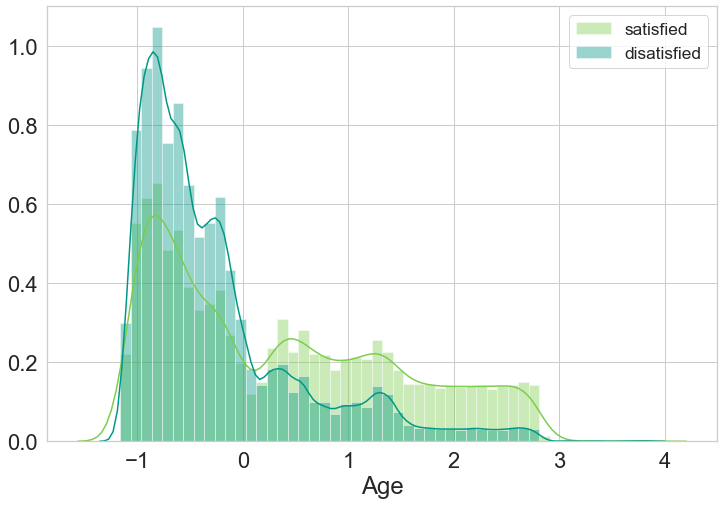

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(scaled_features[scaled_features['satisfaction'] == 1]['Flight Distance'],color = '#7CCC4E', kde=True, norm_hist = False,label = 'satisfied')
sns.distplot(scaled_features[scaled_features['satisfaction'] == 0]['Flight Distance'],color = '#009786',kde=True, norm_hist = False,label = 'disatisfied')
plt.xticks(rotation=0,fontsize = 22)
plt.yticks(rotation=0,fontsize = 22)
plt.xlabel('Age', fontsize=24)
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(fontsize = "xx-large")

-1.1419696399569267e-16